In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_fwf('data-01')
data

,04-21-1991,9:09\t58\t100
0,04-21-1991,9:09\t33\t009
1,04-21-1991,9:09\t34\t013
2,04-21-1991,17:08\t62\t119
3,04-21-1991,17:08\t33\t007
4,04-21-1991,22:51\t48\t123
...,...,...
937,09-02-1991,17:30\t33\t007
938,09-02-1991,23:00\t48\t155
939,09-03-1991,7:20\t58\t110
940,09-03-1991,7:20\t33\t009


### Data Preprocessing and EDA

In [3]:
data['Month-date-year']=data['04-21-1991']
data.drop(columns=['04-21-1991'], inplace = True)
data

,9:09\t58\t100,Month-date-year
0,9:09\t33\t009,04-21-1991
1,9:09\t34\t013,04-21-1991
2,17:08\t62\t119,04-21-1991
3,17:08\t33\t007,04-21-1991
4,22:51\t48\t123,04-21-1991
...,...,...
937,17:30\t33\t007,09-02-1991
938,23:00\t48\t155,09-02-1991
939,7:20\t58\t110,09-03-1991
940,7:20\t33\t009,09-03-1991


In [4]:
## seperate merged feature value
data[['Hour:minute','Category','Target']] = data['9:09\t58\t100'].str.split('\t',expand=True)
data.drop(columns=['9:09\t58\t100'], inplace = True)
data

,Month-date-year,Hour:minute,Category,Target
0,04-21-1991,9:09,33,009
1,04-21-1991,9:09,34,013
2,04-21-1991,17:08,62,119
3,04-21-1991,17:08,33,007
4,04-21-1991,22:51,48,123
...,...,...,...,...
937,09-02-1991,17:30,33,007
938,09-02-1991,23:00,48,155
939,09-03-1991,7:20,58,110
940,09-03-1991,7:20,33,009


In [5]:
## seperate merged feature value
data[['Hour','minute']] = data['Hour:minute'].str.split(':',expand=True)
data.drop(columns=['Hour:minute'], inplace = True)

data[['Month','Date','Year']] = data['Month-date-year'].str.split('-',expand=True)
data.drop(columns=['Month-date-year'], inplace = True)
data

,Category,Target,Hour,minute,Month,Date,Year
0,33,009,9,09,04,21,1991
1,34,013,9,09,04,21,1991
2,62,119,17,08,04,21,1991
3,33,007,17,08,04,21,1991
4,48,123,22,51,04,21,1991
...,...,...,...,...,...,...,...
937,33,007,17,30,09,02,1991
938,48,155,23,00,09,02,1991
939,58,110,7,20,09,03,1991
940,33,009,7,20,09,03,1991


In [6]:
# Feature Scaling->drop Date and Year
data.drop(columns=['Date','Year'],inplace = True)
data

,Category,Target,Hour,minute,Month
0,33,009,9,09,04
1,34,013,9,09,04
2,62,119,17,08,04
3,33,007,17,08,04
4,48,123,22,51,04
...,...,...,...,...,...
937,33,007,17,30,09
938,48,155,23,00,09
939,58,110,7,20,09
940,33,009,7,20,09


In [7]:
# marge two feature Hour and minute in some special way
data['Time'] = (data['Hour'].astype(int)*60) + data['minute'].astype(int) ## astype(int)-->to convrt the datapoints of the particular feature into integer
data.drop(columns=['Hour','minute'],inplace=True)
data

,Category,Target,Month,Time
0,33,009,04,549
1,34,013,04,549
2,62,119,04,1028
3,33,007,04,1028
4,48,123,04,1371
...,...,...,...,...
937,33,007,09,1050
938,48,155,09,1380
939,58,110,09,440
940,33,009,09,440


<BarContainer object of 942 artists>

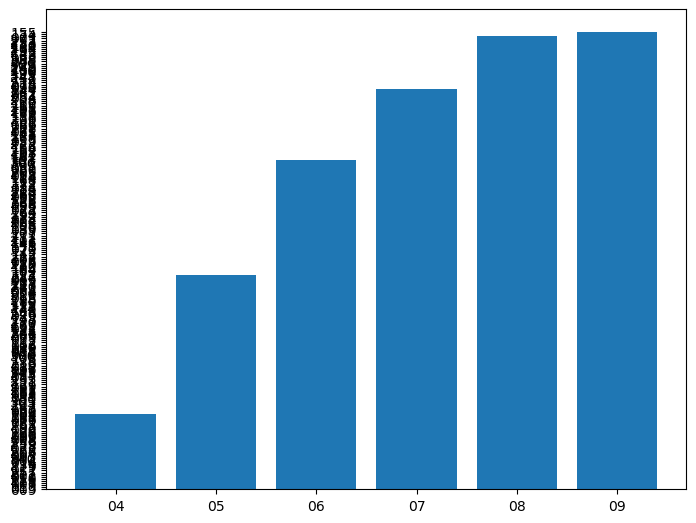

In [8]:
# EDA
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(data.Month,data.Target)

- Observation:- in the 9th (September) month the Diabetic level of the people is higher followed by 8th (August) month 

In [9]:
# Handling Missing Value
data.isnull().sum()

Category    0
Target      0
Month       0
Time        0
dtype: int64

<Axes: >

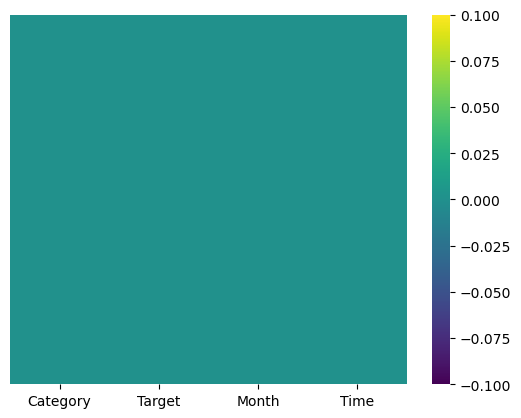

In [10]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

- no missing value to handle

33    384
34    139
58    134
62    102
48     78
60     54
65     51
Name: Category, dtype: int64


<Axes: xlabel='Category', ylabel='count'>

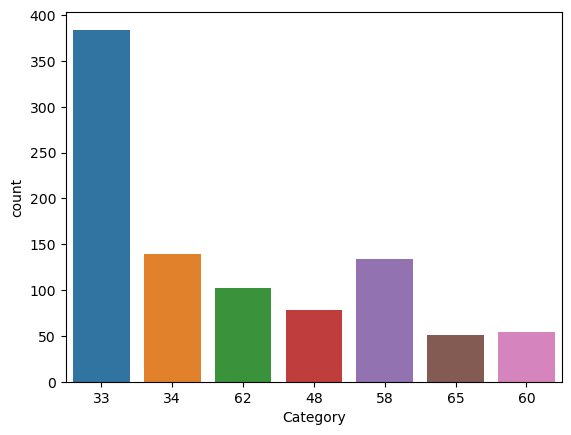

In [11]:
#label encoding on catagory feature
print(data['Category'].value_counts())
sns.countplot(x='Category',data=data)

- catagory with 33 has the most number of diabates cases

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  942 non-null    object
 1   Target    942 non-null    object
 2   Month     942 non-null    object
 3   Time      942 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 25.9+ KB


In [13]:
data['category']=data.Category.astype(int)
data.drop(columns='Category',inplace=True)

data['month']=data.Month.astype(int)
data.drop(columns='Month',inplace=True)
print(data)

    Target  Time  category  month
0      009   549        33      4
1      013   549        34      4
2      119  1028        62      4
3      007  1028        33      4
4      123  1371        48      4
..     ...   ...       ...    ...
937    007  1050        33      9
938    155  1380        48      9
939    110   440        58      9
940    009   440        33      9
941    016   440        34      9

[942 rows x 4 columns]


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    942 non-null    object
 1   Time      942 non-null    int32 
 2   category  942 non-null    int32 
 3   month     942 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 18.5+ KB


In [15]:
# seperate dependent and independent feature
X = data.drop(columns='Target',axis=1)
y=data['Target']
print(X)
print(y)

     Time  category  month
0     549        33      4
1     549        34      4
2    1028        62      4
3    1028        33      4
4    1371        48      4
..    ...       ...    ...
937  1050        33      9
938  1380        48      9
939   440        58      9
940   440        33      9
941   440        34      9

[942 rows x 3 columns]
0      009
1      013
2      119
3      007
4      123
      ... 
937    007
938    155
939    110
940    009
941    016
Name: Target, Length: 942, dtype: object


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)
print(X.shape, X_train.shape, X_test.shape)

(942, 3) (753, 3) (189, 3)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[-1.11208983 -0.7883565  -0.24501642]
 [ 0.8278715   1.37959817 -0.24501642]
 [ 0.03173997  1.22474427 -1.81520676]
 ...
 [-1.1055908  -0.86578345 -0.24501642]
 [ 0.05448658 -0.86578345  0.54007875]
 [-1.1250879  -0.7883565   0.54007875]]
[[ 0.92953801  1.31154694  1.28129175]
 [-0.89542062 -0.86149827  1.28129175]
 [-0.10460521  1.15632942 -0.3494432 ]
 [ 0.83348756 -0.93910703  2.09665922]
 [-1.04910135 -0.93910703 -1.16481068]
 [ 1.87403415  0.22502433  0.46592427]
 [-0.8473954  -0.93910703 -0.3494432 ]
 [ 1.77158033  0.22502433 -0.3494432 ]
 [-0.12701699  1.15632942  1.28129175]
 [ 0.83348756  1.31154694 -1.16481068]
 [ 0.84309261 -0.93910703  0.46592427]
 [ 0.92953801 -0.93910703  1.28129175]
 [ 0.86550438  1.31154694  0.46592427]
 [-0.78336176  1.00111191 -0.3494432 ]
 [-0.99147108 -0.93910703  1.28129175]
 [ 0.17394111 -0.93910703 -1.16481068]
 [-0.91142903  1.00111191 -0.3494432 ]
 [ 1.8836392   0.22502433  0.46592427]
 [ 1.12163892  1.54437321  1.28129175]
 [-0.78336176 -0.93

## Model Creation and tuning

In [18]:
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()
regressor.fit(X_train, y_train) 

SGDRegressor()

In [19]:
y_pred_sgd=regressor.predict(X_test)
r2 = r2_score(y_test, y_pred_sgd)
r2

0.5130392980657152

In [20]:
parameters={'loss':['squared_error','huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
    'penalty':['l2', 'l1', 'elasticnet', 'None'],
    'alpha':[0.1,0.2,0.15,0.05,0.25],
    'max_iter':[int(x) for x in np.linspace(100,5000,10)],
    'tol':[0.001,0.002,0.0015,0.0005,0.0025]
    }
print(parameters)

{'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet', 'None'], 'alpha': [0.1, 0.2, 0.15, 0.05, 0.25], 'max_iter': [100, 644, 1188, 1733, 2277, 2822, 3366, 3911, 4455, 5000], 'tol': [0.001, 0.002, 0.0015, 0.0005, 0.0025]}


In [21]:
# to avoid warning during running the code 
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import GridSearchCV
sgdregressor = SGDRegressor()
sgdregressorcv=GridSearchCV(sgdregressor,parameters,scoring='neg_mean_squared_error',cv=5)
sgdregressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.2, 0.15, 0.05, 0.25],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [100, 644, 1188, 1733, 2277, 2822, 3366,
                                      3911, 4455, 5000],
                         'penalty': ['l2', 'l1', 'elasticnet', 'None'],
                         'tol': [0.001, 0.002, 0.0015, 0.0005, 0.0025]},
             scoring='neg_mean_squared_error')

In [23]:
sgdregressorcv.best_params_

{'alpha': 0.2,
 'loss': 'squared_epsilon_insensitive',
 'max_iter': 2277,
 'penalty': 'l1',
 'tol': 0.001}

In [24]:
best_search_grid=sgdregressorcv.best_estimator_
sgdregressor_pred=best_search_grid.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,sgdregressor_pred)
score

0.5119547613570642

# Predicting for a value

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    942 non-null    object
 1   Time      942 non-null    int32 
 2   category  942 non-null    int32 
 3   month     942 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 18.5+ KB


In [26]:
data.describe()

,Time,category,month
count,942.000000,942.000000,942.000000
mean,770.135881,44.366242,6.335456
std,308.985248,12.921435,1.265917
min,60.000000,33.000000,4.000000
25%,485.000000,33.000000,5.000000
50%,726.000000,34.000000,6.000000
75%,1040.000000,58.000000,7.000000
max,1425.000000,65.000000,9.000000


In [27]:
# give input data as of the feature and corrospponding data 
input_data = (699,62,6)

# changing the input_data to numpy array
input_data_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

# predict the diabetes (suger level) level value by the particular data
y_predict = best_search_grid.predict(std_data)
print(y_predict)

[137.26606362]


# Lifelong Learning

In [28]:
for i in range(2,71):
    if(i<=9):
        data=pd.read_fwf('data-0'+str(i))
    else:
        data=pd.read_fwf('data-'+str(i))
    print(i,"=",data.columns)

2 = Index(['10-10-1989', '08:00', '58', '149'], dtype='object')
3 = Index(['07-21-1990', '06:43', '58', '202'], dtype='object')
4 = Index(['08-19-1990', '17:00', '62', '104'], dtype='object')
5 = Index(['09-01-1990', '16:48', '62', '226'], dtype='object')
6 = Index(['04-29-1989', '08:00', '58', '161'], dtype='object')
7 = Index(['03-27-1989', '22:00', '48', '207'], dtype='object')
8 = Index(['07-31-1990', '12:09', '60', '100'], dtype='object')
9 = Index(['04-22-1990', '18:08', '62', '213'], dtype='object')
10 = Index(['02-18-1989', '08:00', '58', '161'], dtype='object')
11 = Index(['07-13-1990', '09:44', '58', '146'], dtype='object')
12 = Index(['07-22-1990', '09:53', '34', '36'], dtype='object')
13 = Index(['09-04-1990', '05:53', '33', '11'], dtype='object')
14 = Index(['03-11-1991', '18:15', '62', '163'], dtype='object')
15 = Index(['04-13-1991', '08:47', '33', '8'], dtype='object')
16 = Index(['05-22-1991', '07:24', '34', '31'], dtype='object')
17 = Index(['07-13-1990', '09:48', '65

In [29]:
for i in range(2,71):
    if(i<=9):
        data=pd.read_fwf('data-0'+str(i))
    else:
        data=pd.read_fwf('data-'+str(i))
    print(i,"=",data.isnull().sum())

2 = 10-10-1989    0
08:00         0
58            0
149           0
dtype: int64
3 = 07-21-1990    0
06:43         0
58            0
202           0
dtype: int64
4 = 08-19-1990    0
17:00         0
62            0
104           0
dtype: int64
5 = 09-01-1990    0
16:48         0
62            0
226           0
dtype: int64
6 = 04-29-1989    0
08:00         0
58            0
161           0
dtype: int64
7 = 03-27-1989    0
22:00         0
48            0
207           0
dtype: int64
8 = 07-31-1990    0
12:09         0
60            0
100           0
dtype: int64
9 = 04-22-1990    0
18:08         0
62            0
213           0
dtype: int64
10 = 02-18-1989    0
08:00         0
58            0
161           0
dtype: int64
11 = 07-13-1990    0
09:44         0
58            0
146           0
dtype: int64
12 = 07-22-1990    0
09:53         0
34            0
36            0
dtype: int64
13 = 09-04-1990    0
05:53         0
33            0
11            0
dtype: int64
14 = 03-11-1991    0
18:

In [30]:
for i in range(2,71):
    if(i<=9):
        data=pd.read_fwf('data-0'+str(i))
    else:
        data=pd.read_fwf('data-'+str(i))
        
    if(i==27 or i==28 or i==29 or i==30 or i==54 or i==67):
        data['Month-date-year']=data[data.columns[0]]
        data[['Hour:minute','Category','Target']] = data[data.columns[1]].str.split('\t',expand=True)
        data=data.iloc[:,2:]
    else:
        data[['Month-date-year','Hour:minute','Category','Target']] = data[data.columns]
        data=data.iloc[:,4:]   
    
    data[['Hour','minute']] = data['Hour:minute'].str.split(':',expand=True)
    data.drop(columns=['Hour:minute'], inplace = True)

    data[['Month','Date','Year']] = data['Month-date-year'].str.split('-',expand=True)
    data.drop(columns=['Month-date-year'], inplace = True)

    data.drop(columns=['Date','Year'],inplace = True)
    
    data = data.dropna(how='any')
    
    data['Time'] = (data['Hour'].astype(int)*60) + data['minute'].astype(int) ## astype(int)-->to convrt the datapoints of the particular feature into integer
    data.drop(columns=['Hour','minute'],inplace=True)
    

    data['month']=data.Month.astype(int)
    data.drop(columns='Month',inplace=True)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)
    
    best_search_grid.partial_fit(X_train, y_train)

# Predicting the same value after lifelong training

In [31]:
# give input data as of the feature and corrospponding data 
input_data = (699,62,6)

# changing the input_data to numpy array
input_data_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

# predict the diabetes (suger level) level value by the particular data
y_predict = best_search_grid.predict(std_data)
print(y_predict)

[138.62309699]


- we can see the difference of almost 1 unit of suger/diabetes level values after training the model by 70 times for the same input value 